In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 96% 1.02G/1.06G [00:08<00:00, 147MB/s]
100% 1.06G/1.06G [00:08<00:00, 128MB/s]


In [3]:
import zipfile

# Open the zip file
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')

# Extract all the contents to /content
zip_ref.extractall('/content')

# Close the zip file
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
#GENARATORS
# TRAINING DATASET - 80%
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels="inferred",
    label_mode="int",  # CAT=0, DOG=1
    class_names=None,
    color_mode="rgb",
    batch_size=32,     # 625 x 32 = 20000
    image_size=(256, 256),
    shuffle=True,
    seed=42,           # ✅ set seed for reproducibility
    validation_split=0.2,  # ✅ 20% for validation
    subset="training",     # ✅ this is the training part
)

Found 20000 files belonging to 2 classes.
Using 16000 files for training.


In [6]:
# VALIDATION DATASET - 20%
validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels="inferred",
    label_mode="int",  # CAT=0, DOG=1
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=42,               # ✅ must match train_ds seed
    validation_split=0.2,  # ✅ same split
    subset="validation",   # ✅ this is the validation part
)

Found 20000 files belonging to 2 classes.
Using 4000 files for validation.


In [ ]:
#now the imagaes are stored in the fashion of numpy array from 0-255

In [8]:
# normalize it
def process(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image , label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [9]:
#create a CNN model with three CONVO layers
model=Sequential()
# layer 1
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid',strides=2))
#layer 2
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid',strides=2))
#layer 3
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid',strides=2))
# Flatten
model.add(Flatten())
#fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) #final output

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=3,
    verbose=1,
    mode="min",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0,
)


In [13]:
history=model.fit(train_ds,validation_data=validation_ds,epochs=10,callbacks=[early_stopping])

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 55s 86ms/step - accuracy: 0.5603 - loss: 1.9587 - val_accuracy: 0.4890 - val_loss: 0.7000
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 38s 76ms/step - accuracy: 0.6543 - loss: 0.6183 - val_accuracy: 0.6300 - val_loss: 0.6879
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 41s 75ms/step - accuracy: 0.7239 - loss: 0.5346 - val_accuracy: 0.6933 - val_loss: 0.6140
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 38s 76ms/step - accuracy: 0.7669 - loss: 0.4737 - val_accuracy: 0.7483 - val_loss: 0.5453
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 46s 86ms/step - accuracy: 0.7965 - loss: 0.4198 - val_accuracy: 0.7580 - val_loss: 0.5196
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 78s 77ms/step - accuracy: 0.8300 - loss: 0.3599 - val_accuracy: 0.7815 - val_loss: 0.5488
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 39s 77ms/step - accuracy: 0.8597 - loss: 0.3096 - val_accuracy: 0.7095 - val_loss: 0.7962
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 39s 77ms/step - accuracy: 0.8779 - loss: 0.2631 - 

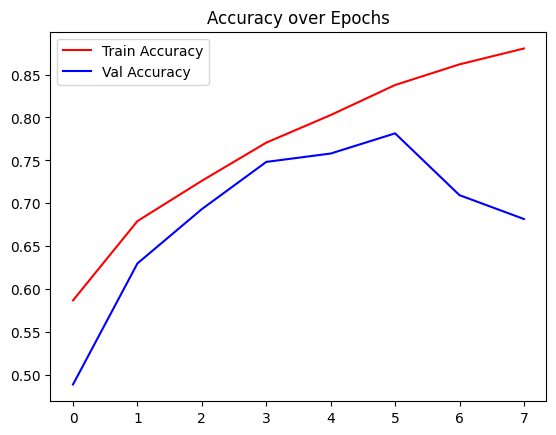

In [14]:
# PLOT ACCURACY
# ========================
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy', color='red')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='blue')
plt.legend()
plt.title("Accuracy over Epochs")
plt.show()


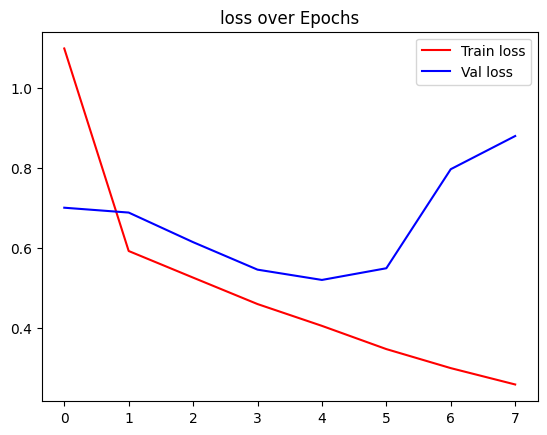

In [15]:
# PLOT LOSS
# ========================

plt.plot(history.history['loss'], label='Train loss', color='red')
plt.plot(history.history['val_loss'], label='Val loss', color='blue')
plt.legend()
plt.title("loss over Epochs")
plt.show()

In [43]:
#testtimonials

In [16]:
import cv2

In [24]:
test_img=cv2.imread('/content/dog.jpg')

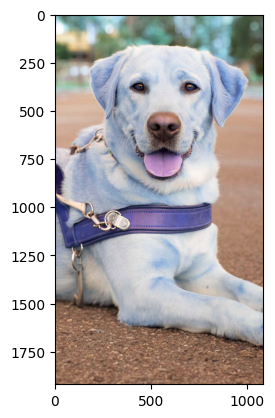

In [25]:
plt.imshow(test_img)

In [26]:
test_img.shape

(1920, 1080, 3)

In [27]:
test_img=cv2.resize(test_img,(256,256))

In [28]:
test_input=test_img.reshape((1,256,256,3)) #bcs we pass in batches and we have only one img to pass so the first arg is 1

In [29]:
y_pred=model.predict(test_input)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[1.]], dtype=float32)

In [30]:
if y_pred[0][0]==1:
  print("Dog")
else:
  print("Cat")

Dog


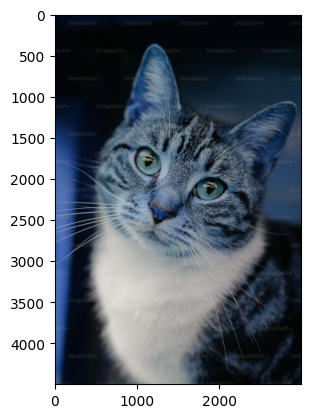

In [33]:
test_img_2=cv2.imread('/content/cat.jpeg')
plt.imshow(test_img_2)

In [35]:
test_img_2.shape

(4499, 3000, 3)

In [37]:
test_img_2=cv2.resize(test_img_2,(256,256))
test_input_2=test_img_2.reshape((1,256,256,3))
y_pred=model.predict(test_input_2)
y_pred



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0.]], dtype=float32)

In [38]:
if y_pred[0][0]==1:
  print("Dog")
else:
  print("Cat")

Cat


In [40]:
import numpy as np
from sklearn.metrics import accuracy_score

# Step 1: Get true labels and images from validation set
y_true = []
y_pred = []

for images, labels in validation_ds:
    preds = model.predict(images)
    preds = (preds >= 0.5).astype(int).flatten()

    y_pred.extend(preds)
    y_true.extend(labels.numpy().flatten())

# Step 2: Accuracy
acc = accuracy_score(y_true, y_pred)
print(f"Validation Accuracy (sklearn):{ acc*100}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━

In [41]:
# Step 2: Accuracy
acc = accuracy_score(y_true, y_pred)
print(f"Validation Accuracy (sklearn):{acc*100}%")

Validation Accuracy (sklearn):75.8%


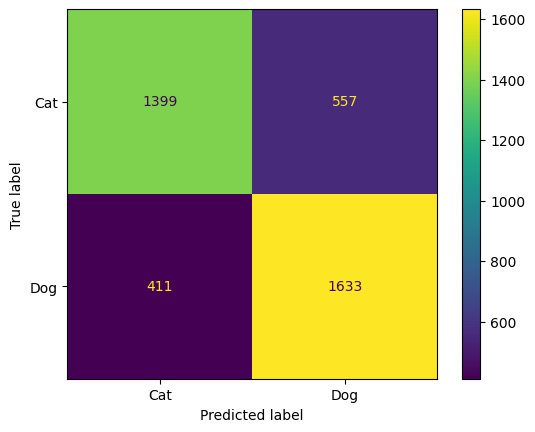

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Cat", "Dog"])
disp.plot()
